In [1]:
%matplotlib inline
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

from opm import calculate_map, plot_opm, plot_amplitude_map
from opm.plot import plot_orientation_histogram
from opm.response import create_stimuli, compute_responses

## Load data
- cond1 bezeichnet 100% Kontrast
- cond 2 mit 25%
- cond 3 mit 12,5%.

In der ersten Dimension der Matrix sind die 8 Stimulationen beginnt mit 0 Grad (Balken von links nach rechts) und dann gegen den Uhrzeigersinn in 45 grad Schritten.

In [2]:
mat = scipy.io.loadmat('data/avg_cat_data.mat')

cond1 = mat['cond1'][:,np.newaxis,:,:]
cond2 = mat['cond2'][:,np.newaxis,:,:]
cond3 = mat['cond3'][:,np.newaxis,:,:]

contrasts = [1.0, 0.25, 0.125]

data = dict(zip(contrasts, [cond1, cond2, cond3]))
cond1.shape

(8, 1, 301, 301)

In [3]:
angles = [i * np.pi / 4 for i in range(4)]*2

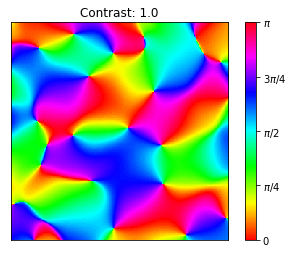

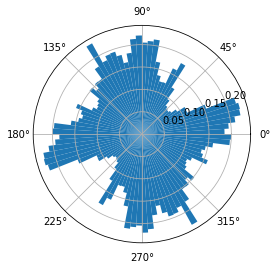

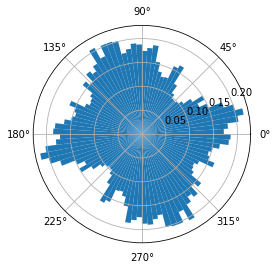

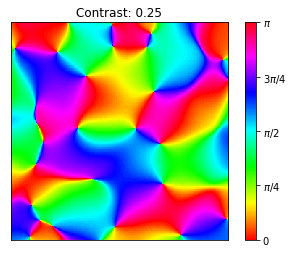

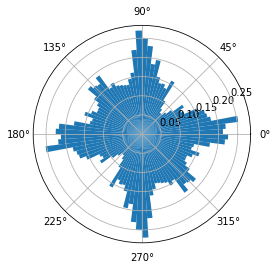

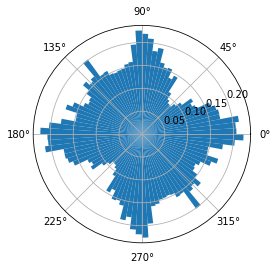

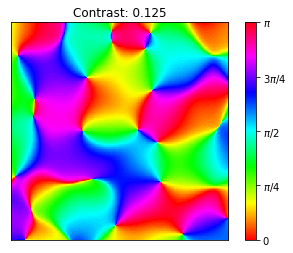

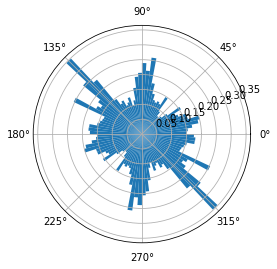

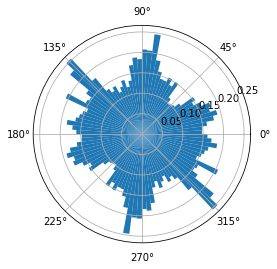

In [5]:
for contrast, responses in data.items():
    stimuli = create_stimuli([contrast], angles, 1)
    
    result = calculate_map(responses, stimuli)
    m_hat = result[0] + 1j * result[1]
    plot_opm(m_hat, pinwheels=False, shade=False, title='Contrast: {}'.format(contrast))
    plt.show()
    
    plot_orientation_histogram(m_hat, bins=100, weighted=True, polar=True, density=True)
    plot_orientation_histogram(m_hat, bins=100, weighted=False, polar=True, density=True)
    #plot_orientation_histogram(m_hat, bins=100, weighted=False, polar=False)
    plt.show()